# Assignment 1

## Importing the libraries

In [31]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from enum import Enum
from numpy import mean
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tqdm import tqdm
# Initializing a random seed
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")
from numpy import save
from numpy import load

In [32]:
DATASET_LOC = 'dataset'

In [33]:
movies_cols = ['MovieID', 'Title','Genres']
rating_cols = ['UserID', 'MovieID', 'Rating', 'Timestamp']
users_cols = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [34]:
movies_df = pd.read_csv(f'{DATASET_LOC}/movies.dat', names=movies_cols, header=None, 
    sep='::', engine='python', encoding='ISO-8859-1')
ratings_df = pd.read_csv(f'{DATASET_LOC}/ratings.dat', names=rating_cols, header=None, 
    sep='::', engine='python', encoding='ISO-8859-1')
users_df = pd.read_csv(f'{DATASET_LOC}/users.dat', names=users_cols, header=None, 
    sep='::', engine='python', encoding='ISO-8859-1')

In [35]:
users_df

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [36]:
movies_df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [37]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


**For testing and debugging purposes**

## Task1: Calculating the 5 formulas of the 'Naive' approach

### Global rating average

In [38]:
y = ratings_df['Rating']
skf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
maes = []
rmses_train = []
maes_train = []
for train_index, test_index in skf.split(y):
    y_train, y_test = y[train_index], y[test_index]
    pred = y_train.mean()
    # print(pred)
    y_pred = np.full((len(y_test)), pred, dtype=float)
    rmses.append(mean_squared_error(y_test, y_pred, squared=False))
    maes.append(mean_absolute_error(y_test, y_pred))
    # RMSE & MAE for train
    y_pred_train = np.full((len(y_train)), pred, dtype=float)
    rmses_train.append(mean_squared_error(y_train, y_pred_train, squared=False))
    maes_train.append(mean_absolute_error(y_train, y_pred_train))
np.array(rmses).mean()
print('Average RMSE train:\t', np.array(rmses_train).mean(), '\t| Average RMSE test:\t', np.array(rmses).mean())
print('Average MAE train:\t', np.array(maes_train).mean(), '\t| Average MAE test:\t', np.array(maes).mean())

Average RMSE train:	 1.117101058798404 	| Average RMSE test:	 1.117101450528282
Average MAE train:	 0.9338605988472766 	| Average MAE test:	 0.9338619186570455


In [39]:
ratings_df = pd.read_csv(f'{DATASET_LOC}/ratings.dat', names=rating_cols, header=None, sep='::', engine='python')

### Mean rating per movie

In [40]:
y = ratings_df.copy()
skf = KFold(n_splits=5, shuffle=True)
rmses = []
maes = []
rmses_train = []
maes_train = []
for train_index, test_index in skf.split(y):  
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]
  R_global = y_train['Rating'].mean()
  R_item = y_train.groupby(['MovieID'], as_index=False)['Rating'].mean()
  merged = pd.merge(y_test['MovieID'], R_item[['MovieID','Rating']], on='MovieID', how='left')
  y_pred = merged.fillna(R_global)
  rmses.append(mean_squared_error(y_test['Rating'], y_pred['Rating'], squared=False))
  maes.append(mean_absolute_error(y_test['Rating'], y_pred['Rating']))
  # training set
  R_item = y_train.groupby(['MovieID'], as_index=False)['Rating'].mean()
  y_pred = pd.merge(y_train['MovieID'], R_item[['MovieID','Rating']], on='MovieID', how='left')
  rmses_train.append(mean_squared_error(y_train['Rating'], y_pred['Rating'], squared=False))
  maes_train.append(mean_absolute_error(y_train['Rating'], y_pred['Rating']))
print('Average RMSE train:\t', np.array(rmses_train).mean(), '\t| Average RMSE test:\t', np.array(rmses).mean())
print('Average MAE train:\t', np.array(maes_train).mean(), '\t| Average MAE test:\t', np.array(maes).mean())

Average RMSE train:	 0.9742283446390194 	| Average RMSE test:	 0.9793666761448853
Average MAE train:	 0.7783363352007652 	| Average MAE test:	 0.7822841972440417


### Mean for rating per user

In [41]:
ratings_df = pd.read_csv(f'{DATASET_LOC}/ratings.dat', names=rating_cols, header=None, sep='::', engine='python')

In [42]:
y = ratings_df.copy()
skf = KFold(n_splits=5, shuffle=True)
rmses = []
maes = []
rmses_train = []
maes_train = []
for train_index, test_index in skf.split(y):  
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]
  R_global = y_train['Rating'].mean()
  R_user = y_train.groupby(['UserID'], as_index=False)['Rating'].mean()
  merged = pd.merge(y_test['UserID'], R_user[['UserID','Rating']], on='UserID', how='left')
  y_pred = merged.fillna(R_global)
  rmses.append(mean_squared_error(y_test['Rating'], y_pred['Rating'], squared=False))
  maes.append(mean_absolute_error(y_test['Rating'], y_pred['Rating']))

  # training set
  R_user = y_train.groupby(['UserID'], as_index=False)['Rating'].mean()
  y_pred = pd.merge(y_train['UserID'], R_user[['UserID','Rating']], on='UserID', how='left')
  rmses_train.append(mean_squared_error(y_train['Rating'], y_pred['Rating'], squared=False))
  maes_train.append(mean_absolute_error(y_train['Rating'], y_pred['Rating']))
print('Average RMSE train:\t', np.array(rmses_train).mean(), '\t| Average RMSE test:\t', np.array(rmses).mean())
print('Average MAE train:\t', np.array(maes_train).mean(), '\t| Average MAE test:\t', np.array(maes).mean())

Average RMSE train:	 1.0276822962695291 	| Average RMSE test:	 1.035395812703177
Average MAE train:	 0.8227544756430258 	| Average MAE test:	 0.8289078965218524


### Approaches 4 & 5: Linear Regression Models with and without intercepts

<h3>Enums for our linear regression model types</h3>

In [43]:
class LREG(Enum):
  DEFAULT = 'With Intercept'
  NO_INTERCEPT = 'Without Intercept'

<h3>Dictionary connecting enum values and Linear regression models</h3>

In [44]:
lregression = {
  LREG.DEFAULT: LinearRegression(),
  LREG.NO_INTERCEPT: LinearRegression(fit_intercept=False)
}

<h3>Creating our X and y tables and building K-folds with our regression model</h3>

In [45]:
ratings_df = pd.read_csv(f'{DATASET_LOC}/ratings.dat', names=rating_cols, header=None, sep='::', engine='python')

<h3>Method for getting y_train and y_test to create the X_train and X_test</h3>

In [46]:
# Create X_test  & X_train
def createX(y, R_global):
    R_item = y.groupby(['MovieID'], as_index=False)['Rating'].mean().rename(
                        columns={'Rating':'MovieRating'})
    merged = pd.merge(y[['MovieID', 'UserID']], R_item[['MovieID','MovieRating']], on='MovieID', how='left')
    R_user = y.groupby(['UserID'], as_index=False)['Rating'].mean().rename(
                        columns={'Rating':'UserRating'})

    X = pd.merge(merged[['UserID', 'MovieID', 'MovieRating']], R_user[['UserID','UserRating']], on='UserID', how='left')
    X = X.fillna(R_global)[['UserRating', 'MovieRating']]
    return X

<h3>Method to replace value smaller than 1 and bigger than 5 with 1 and 5 respectively</h3>

In [47]:
results = []
y = ratings_df.copy()
skf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
maes = []
rmses_train = []
maes_train = []

for l in LREG:
  predictions = []
  print(l.value, ': \t\t\t|')
  for train_index, test_index in skf.split(y):  
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    lreg = lregression[l]
    R_global = y_train['Rating'].mean()
    # cv = KFold(n_splits=5, random_state=1, shuffle=True)
    X_train = createX(y_train, R_global)
    X_test = createX(y_test, R_global)
    lreg.fit(X_train[['UserRating', 'MovieRating']], y_train['Rating'])
    y_pred = lreg.predict(X_test[['UserRating', 'MovieRating']])
    y_pred_train = lreg.predict(X_train[['UserRating', 'MovieRating']])
    y_pred_train[y_pred_train<1] = 1
    y_pred_train[y_pred_train>5] = 5
    y_pred[y_pred<1] = 1
    y_pred[y_pred>5] = 5
    rmses.append(mean_squared_error(y_test['Rating'], y_pred, squared=False))
    maes.append(mean_absolute_error(y_test['Rating'], y_pred))
    rmses_train.append(mean_squared_error(y_train['Rating'], y_pred_train, squared=False))
    maes_train.append(mean_absolute_error(y_train['Rating'], y_pred_train))
  print('Average RMSE:\t', np.array(rmses).mean(), '\t|', ' Average RMSE train:\t', np.array(rmses_train).mean(), '\t|')
  print('Average MAE:\t', np.array(maes).mean(), '\t|', ' Average MAE train:\t', np.array(maes_train).mean(), '\t|')
  print('----------------------------------------|')

With Intercept : 			|
Average RMSE:	 0.9003059307247255 	|  Average RMSE train:	 0.9145558777314214 	|
Average MAE:	 0.7123155529006293 	|  Average MAE train:	 0.7248101591327052 	|
----------------------------------------|
Without Intercept : 			|
Average RMSE:	 0.9174777225414216 	|  Average RMSE train:	 0.9305598316354603 	|
Average MAE:	 0.7305426685645153 	|  Average MAE train:	 0.7416822136831845 	|
----------------------------------------|


## Task 2: Creating the user item interactions table

In [48]:
# for debuggin and testing purposes
df_ratings = pd.read_csv(f'{DATASET_LOC}/ratings.dat', names=rating_cols, header=None, sep='::', engine='python')
M = df_ratings.pivot(
    index='UserID',
    columns='MovieID',
    values='Rating'
)
d = 24


R_item = df_ratings.groupby(['MovieID'], as_index=False)['Rating'].mean().rename(
                    columns={'Rating':'MovieRating'})
R_user = df_ratings.groupby(['UserID'], as_index=False)['Rating'].mean().rename(
                    columns={'Rating':'UserRating'})

R_user = np.array(R_user['UserRating'])
R_item = np.array(R_item['MovieRating'])


In [49]:
M

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
def data_processing(matrix, y_train, flag):
    R_item = y_train.groupby(['MovieID'], as_index=False)['Rating'].mean().rename(
                    columns={'Rating':'MovieRating'})
    R_user = y_train.groupby(['UserID'], as_index=False)['Rating'].mean().rename(
                        columns={'Rating':'UserRating'})

    R_user = np.array(R_user['UserRating'])
    R_item = np.array(R_item['MovieRating'])

    if flag == 0: # preprocess
        print('preprocessing')
        matrix = matrix - np.repeat(R_item[None],len(R_user),axis=0)
        matrix = matrix - np.repeat(R_user[None].T,len(R_item),axis=1)
    elif flag == 1: # unprocess
        print('unprocessing')
        matrix = matrix + np.repeat(R_user[None].T,len(R_item),axis=1)
        matrix = matrix + np.repeat(R_item[None],len(R_user),axis=0)
    
    return matrix

In [51]:
def create_UV(M, d):
    initialization = np.sqrt(np.abs((np.nanmean(M)/d)))
    U = np.full((np.size(M, 0), d), fill_value=initialization, dtype=float)
    V = np.full((d, np.size(M, 1)), fill_value=initialization, dtype=float)
    return U, V

In [52]:
def find_x(M, U, V, r, s):
    inner_dot = np.dot(np.delete(U, s, axis=1)[r], np.delete(V, s, axis=0))
    subtracted = M[r] - inner_dot
    top = np.nansum(V[s] * subtracted)
    non_nan = ~np.isnan(M[r])
    return top/np.nansum((non_nan * V[s])**2)

In [53]:
def find_y(M, U, V, r, s):
    dot_prod = np.dot(np.delete(U, r, axis=1), np.delete(V, r, axis=0)[:,s])
    subtracted = M[:,s] - dot_prod
    top = np.nansum(U[:,r] * subtracted)
    non_nan = ~np.isnan(M[:,s])
    return top/np.nansum((non_nan * U[:,r])**2)

In [54]:
def normalization(matrix):
    normalized = matrix.copy()
    norm_val = (np.nanmean(normalized, axis=1, 
                keepdims=True)/2) + (np.nanmean(normalized, axis=0, keepdims=True)/2)
    normalized -= norm_val
    normalized = normalized.to_numpy(na_value=np.nan)
    return normalized, norm_val

In [55]:
def denormalization(UV, norm_val):
    UV += norm_val
    UV[UV<1] = 1
    UV[UV>5] = 5
    return UV

In [56]:
def RMSE(target,predictions):
    return np.sqrt(np.nansum(np.nansum((target - predictions) ** 2, axis=1)) / (target.size - np.isnan(target).sum()))


def MAE(target, predictions):
    return np.nansum(np.nansum(np.abs((target - predictions)), axis=1)) / (target.size - np.isnan(target).sum())

In [57]:
def UV_decomposition(M, U, V):
    for r in range(np.size(U, 0)): # iterating rows
        for s in range(np.size(U, 1)): # iterating cols
            U[r][s] = find_x(M, U, V, r, s)
    for r in range(np.size(V, 0)): # iterating rows
        for s in range(np.size(V, 1)): # iterating cols
            V[r][s] = find_y(M, U, V, r, s)
    UV = np.dot(U, V)
    return np.array(np.dot(U, V), dtype=float),  RMSE(M, UV), MAE(M, UV) # UV matrix

In [58]:
def evalutation(UV, y_test, index, columns, R_global):
    predictions_df = pd.DataFrame(UV,index=index,columns=columns)
    predictions_df = predictions_df.reset_index()
    predictions_df = pd.melt(predictions_df,id_vars=['UserID'],
                            value_vars=predictions_df.columns.drop('UserID'),
                            value_name='Predicted')
    merged = pd.merge(y_test, predictions_df, on=['UserID', 'MovieID'],how='left'
                    ).rename(columns={'Rating_x': 'Rating', 'Rating_y': 'Predicted'})
    merged['Predicted'] = merged.Predicted.fillna(R_global)
    test_RMSE = mean_squared_error(merged['Rating'], merged['Predicted'], squared=False)
    test_MAE = mean_absolute_error(merged['Rating'], merged['Predicted'])
    return test_RMSE, test_MAE

In [59]:
skf = KFold(n_splits=5, shuffle=True, random_state=42)
df_ratings = pd.read_csv(f'{DATASET_LOC}/ratings.dat', names=rating_cols, header=None, sep='::', engine='python')
y = df_ratings.copy()
degrees = [8, 16, 24, 32, 44]
rmses_final_train = []
maes_final_train = []
rmses_final_test = []
maes_final_test = []
iterations = 20
for d in degrees:
  print('Degree: ', d)
  rmses_train = []
  maes_train = []
  rmses_test = []
  maes_test = []
  for train_index, test_index in skf.split(y):  
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    rmses_ave_train = []
    maes_ave_train = []
    rmses_ave_test = []
    maes_ave_test = []
    R_global = y_train['Rating'].mean()
    M = y_train.pivot(
      index='UserID',
      columns='MovieID',
      values='Rating'
    )
    index = M.index
    columns = M.columns
    M, norm_val = normalization(M)
    U, V = create_UV(M, d)
    U = np.array(U, dtype=float)
    V = np.array(V, dtype=float)
    for x in range(iterations):
      # print('Iteration: ', x)
      UV, rmse_train, mae_train = UV_decomposition(M, U, V)
      # UV = data_processing(UV, y_train, 1)
      UV = denormalization(UV, norm_val)
      rmse, mae = evalutation(UV, y_test, index, columns, R_global)
      # test
      rmses_ave_test.append(rmse)
      maes_ave_test.append(mae)
      # train
      rmses_ave_train.append(rmse_train)
      maes_ave_train.append(mae_train)
    # test
    rmses_test.append(np.array(rmses_ave_test))
    maes_test.append(np.array(maes_ave_test))
    # train
    rmses_train.append(np.array(rmses_ave_train))
    maes_train.append(np.array(maes_ave_train))
  # test
  rmses_final_test.append(np.array(rmses_test))
  maes_final_test.append(np.array(maes_test))
  # train
  rmses_final_train.append(np.array(rmses_train))
  maes_final_train.append(np.array(maes_train))
  
# print(rmses_final_test)
# print(maes_final_test)

Degree:  8
Degree:  16
Degree:  24
Degree:  32
Degree:  44


In [62]:
# Exporting the data generated for experimental results
rmse_export_test = (np.mean(rmses_final_test, axis=1))
rmse_export_train = (np.mean(rmses_final_train, axis=1))
mae_export_test = (np.mean(maes_final_test, axis=1))
mae_export_train = (np.mean(maes_final_train, axis=1))
save('out/rmses_test.npy', rmse_export_test)
save('out/rmses_train.npy', rmse_export_train)
save('out/maes_test.npy', mae_export_test)
save('out/maes_train.npy', mae_export_train)

In [72]:
rmses_resutls_test = load('out/rmses_test.npy')
maes_resutls_test = load('out/maes_test.npy')

test_concat = [rmses_resutls_test, maes_resutls_test]

# for train 
rmses_resutls_train = load('out/rmses_train.npy')
maes_resutls_train= load('out/maes_train.npy')

train_concat = [rmses_resutls_train, maes_resutls_train]


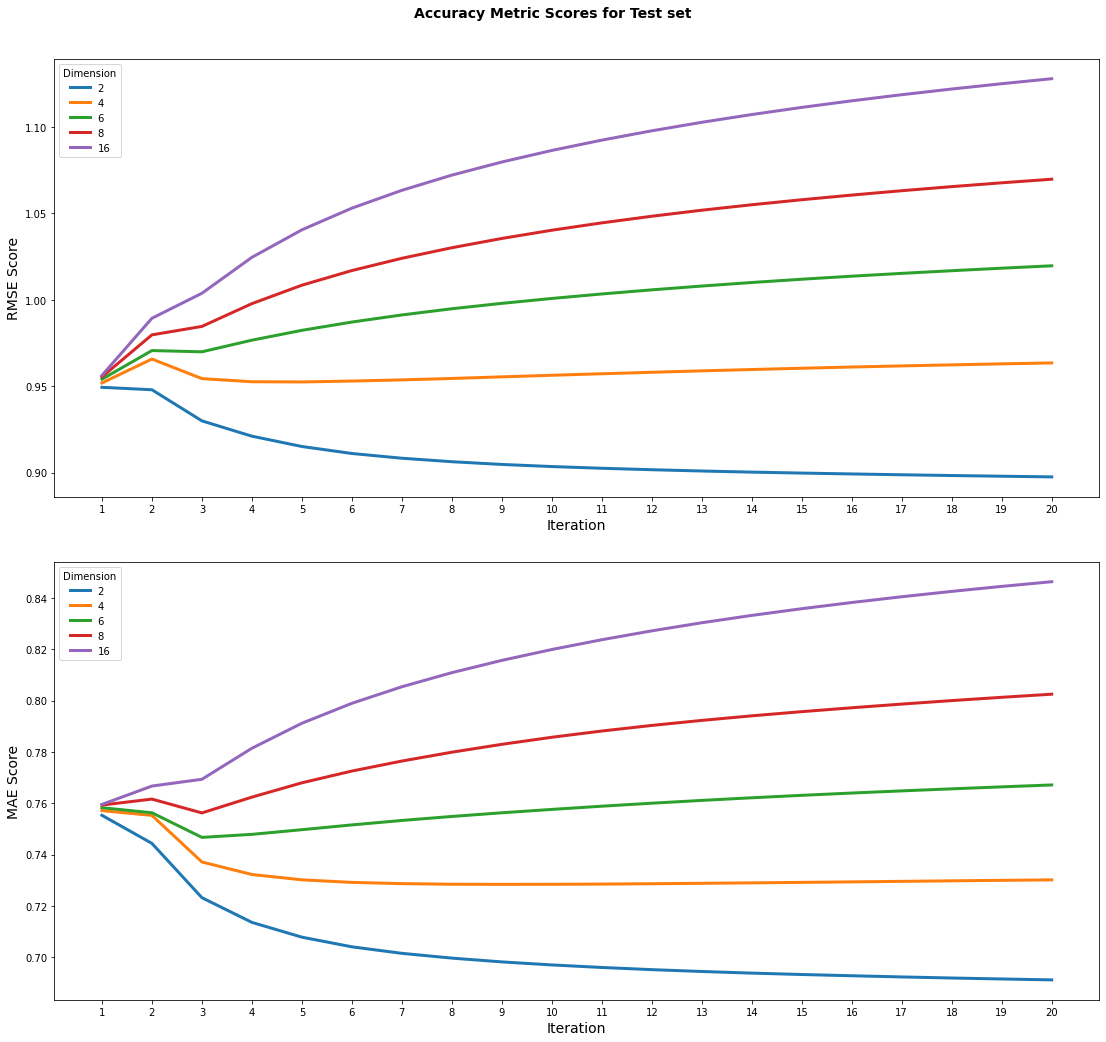

In [73]:
# for test scores
degree_labels = np.array([2, 4, 6, 8, 16, 24, 32, 44])
metric = ['RMSE Score', 'MAE Score']
fig, ax = plt.subplots(2,1, figsize=(16, 15))
for index, y in enumerate(test_concat):
    x = np.array(range(20)) + 1
    fig.suptitle('Accuracy Metric Scores for Test set', fontsize=14, fontweight='bold')
    ax[index].set_xticks(x)
    line_of_objects = ax[index].plot(x, y.T, linewidth=3.0)
    ax[index].legend(iter(line_of_objects), degree_labels, title="Dimension", fontsize='medium', fancybox=True)
    ax[index].set_ylabel(metric[index], fontsize=14)
    ax[index].set_xlabel('Iteration', fontsize=14)

    fig.tight_layout(pad=3)

plt.show()


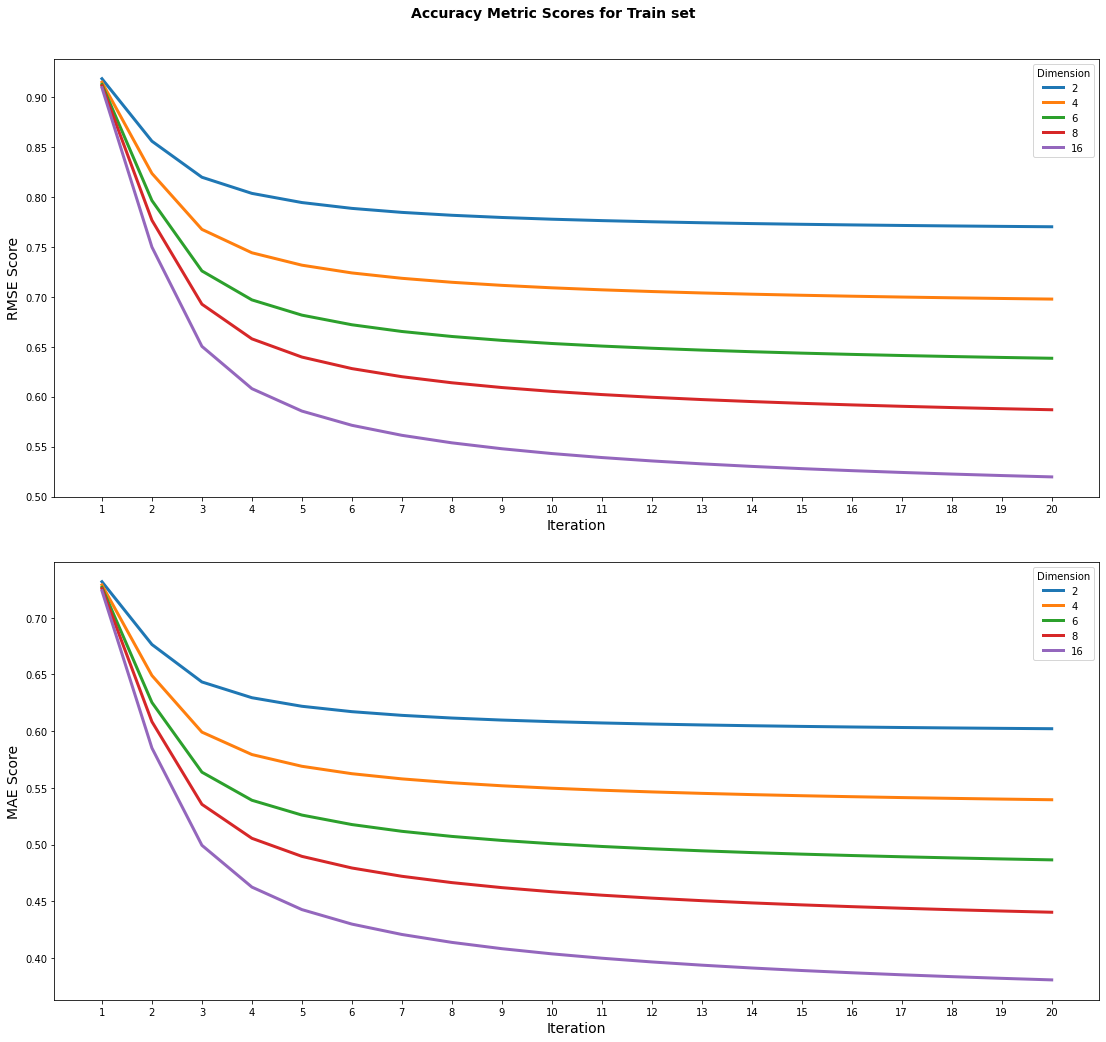

In [74]:
# for test scores
degree_labels = np.array([2, 4, 6, 8, 16, 24, 32, 44])
metric = ['RMSE Score', 'MAE Score']
fig, ax = plt.subplots(2,1, figsize=(16, 15))
for index, y in enumerate(train_concat):
    x = np.array(range(20)) + 1
    fig.suptitle('Accuracy Metric Scores for Train set', fontsize=14, fontweight='bold')
    ax[index].set_xticks(x)
    line_of_objects = ax[index].plot(x, y.T, linewidth=3.0)
    ax[index].legend(iter(line_of_objects), degree_labels, title="Dimension", fontsize='medium', fancybox=True)
    ax[index].set_ylabel(metric[index], fontsize=14)
    ax[index].set_xlabel('Iteration', fontsize=14)

    fig.tight_layout(pad=3)

plt.show()